In [2]:
import pandas as pd
import re
import numpy as np
from scipy import stats

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from dateutil import parser
from datetime import datetime

# Purpose

This notebook is meant to analyze VA data based on master.csv. 

# Reading in Data

In [3]:
master = pd.read_csv("Master/Master.csv")
df = master
master.head()

,Appts_Pending_1412,%_Appts_Over_30_Pending_1412,PC_Wait_Pending_1412,SC_Wait_Pending_1412,MH_Wait_Pending_1412,ID,ORGANIZATION,MAY-FY11,MAY-FY12,MAY-FY13,...,SC_Wait_Complete_Increase,SC_Wait_Complete_Increase_%,MH_Wait_Pending_Increase,MH_Wait_Pending_Increase_%,MH_Wait_Complete_Increase,MH_Wait_Complete_Increase_%,Staff_To_Appts_Pending_14,Staff_To_Appts_Pending_16,Staff_To_Appts_Complete_14,Staff_To_Appts_Complete_16
0,42899,2.70%,2.51,4.07,2.77,402to,(V01) (402) HCS TOGUS ME,1293.0,1272.0,1248.0,...,-0.61,-0.182635,0.85,0.338645,0.44,0.307692,0.029907,0.033158,0.052457,0.050413
1,23709,2.16%,3.92,3.95,0.79,405wh,(V01) (405) MROC WHT RIVER JCT VT,852.0,853.0,881.0,...,0.86,0.267081,1.07,0.272959,0.48,0.571429,0.038846,0.055806,0.047889,0.054539
2,8105,5.17%,1.12,10.53,4.41,518be,(V01) (518) MC BEDFORD MA,1313.0,1265.0,1245.0,...,0.71,0.133962,-1.34,-1.196429,-2.91,-0.792916,0.154349,0.093525,0.104459,0.102658
3,85625,1.71%,1.66,3.53,3.92,523va,(V01) (523) HCS BOSTON MA,4022.0,4011.0,4041.0,...,2.58,0.813880,-0.84,-0.506024,-0.46,-0.174905,0.047089,0.051000,0.088287,0.092925
4,19511,2.64%,2.66,4.21,5.13,608ma,(V01) (608) MC MANCHESTER NH,663.0,683.0,691.0,...,-0.72,-0.197260,0.08,0.030075,-0.07,-0.023256,0.035160,0.031584,0.038942,0.042602


In [4]:
df.columns

Index([u'Appts_Pending_1412', u'%_Appts_Over_30_Pending_1412',
       u'PC_Wait_Pending_1412', u'SC_Wait_Pending_1412',
       u'MH_Wait_Pending_1412', u'ID', u'ORGANIZATION', u'MAY-FY11',
       u'MAY-FY12', u'MAY-FY13', u'MAY-FY14', u'MAY-FY15', u'MAY-FY16',
       u'Appts_Pending_1610', u'%_Appts_Over_30_Pending_1610',
       u'PC_Wait_Pending_1610', u'SC_Wait_Pending_1610',
       u'MH_Wait_Pending_1610', u'Appts_Complete_1608',
       u'%_Appts_Over_30_Complete_1608', u'PC_Wait_Complete_1608',
       u'SC_Wait_Complete_1608', u'MH_Wait_Complete_1608', u'Station',
       u'Location', u'for_dups', u'Choice_Hires', u'Interim', u'Vacancy',
       u'%_Appts_Over_30_Complete_1409', u'Appts_Complete_1409',
       u'MH_Wait_Complete_1409', u'PC_Wait_Complete_1409',
       u'SC_Wait_Complete_1409', u'Physician_Turnover_FY11',
       u'Physician_Turnover_FY12', u'Physician_Turnover_FY13',
       u'Physician_Turnover_FY14', u'Physician_Turnover_FY15',
       u'Pending_Increase', u'Pending_In

In [5]:
# National
national_complete = pd.read_csv("Wait_Time/Completed_Cleaned/National_Complete.csv")
national_pending = pd.read_csv("Wait_Time/Pending_Clean/National_Pending.csv")


#used to strip time from Pending_Time
def get_date(test):
    test = test.strip('National: ')
    return parser.parse(test)

national_complete["date"] = national_complete["Complete_Time"].apply(get_date)
national_pending["date"] = national_pending["Pending_Time"].apply(get_date)
national_pending = national_pending.drop(20) #for some reason this was read in as 1989. Just dropping it


# Look at Pending Versus Complete

count       141.000000
mean      11503.765957
std       16722.668013
min       -5744.000000
25%        2798.000000
50%        7151.000000
75%       14007.000000
max      110496.000000
Name: Pending_Increase, dtype: float64
R-squared: 0.883852582905


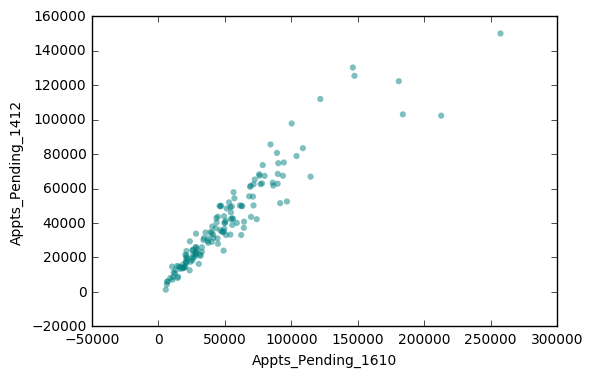

In [34]:
ax = df.plot(kind ='scatter',x='Appts_Pending_1610',y='Appts_Pending_1412',color='teal', edgecolor='none',alpha=.5)


print df["Pending_Increase"].describe()

slope, intercept, r_value, p_value, std_err = stats.linregress(df["Appts_Pending_1610"],df["Appts_Pending_1412"])
print "R-squared: "+ str(r_value**2)

count      141.000000
mean      2468.141844
std       3033.488540
min      -3430.000000
25%        387.000000
50%       1823.000000
75%       3921.000000
max      17594.000000
Name: Complete_Increase, dtype: float64
R-squared: 0.98254215049


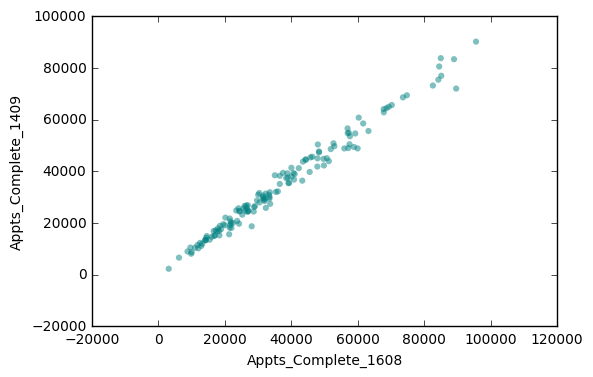

In [35]:
ax = df.plot(kind ='scatter',x='Appts_Complete_1608',y='Appts_Complete_1409',color='teal', edgecolor='none',alpha=.5)
print df["Complete_Increase"].dropna().describe()

slope, intercept, r_value, p_value, std_err = stats.linregress(df["Appts_Complete_1608"],df["Appts_Complete_1409"])
print "R-squared: "+ str(r_value**2)

### Thoughts
While there was an increase in both pending and completed appointments from 2014 to 2016, the pending saw a significantly bigger increase. 

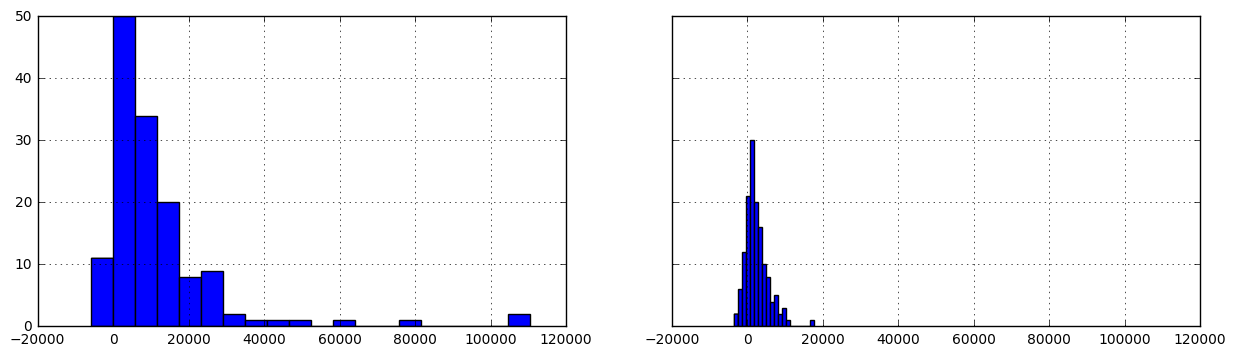

In [8]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(15,4))
df["Pending_Increase"].hist(bins=20, ax=ax1)
df["Complete_Increase"].hist(bins=20,ax=ax2)

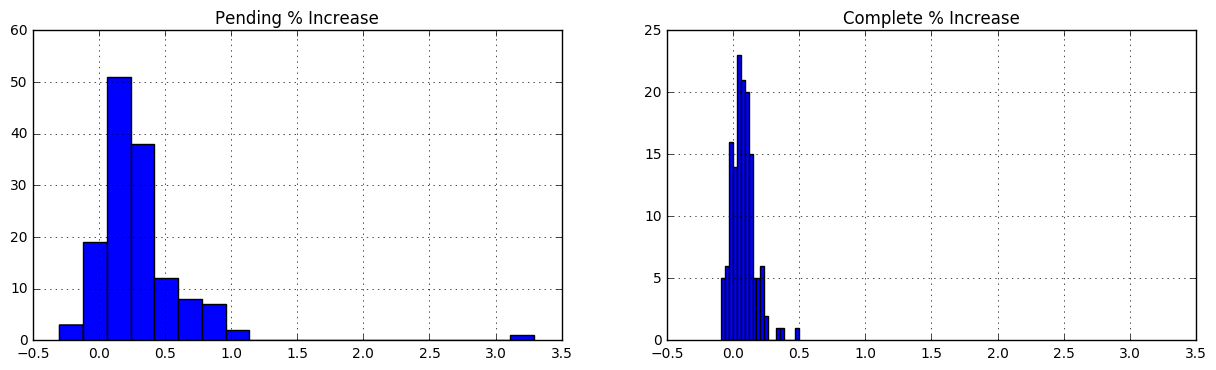

In [9]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(15,4))
ax1.set_title("Pending % Increase")
df["Pending_Increase_%"].hist(bins=20, ax=ax1)
ax2.set_title("Complete % Increase")
df["Complete_Increase_%"].hist(bins=20,ax=ax2)

R-squared 2014: 0.819755954321
R-squared 2016: 0.770749874578


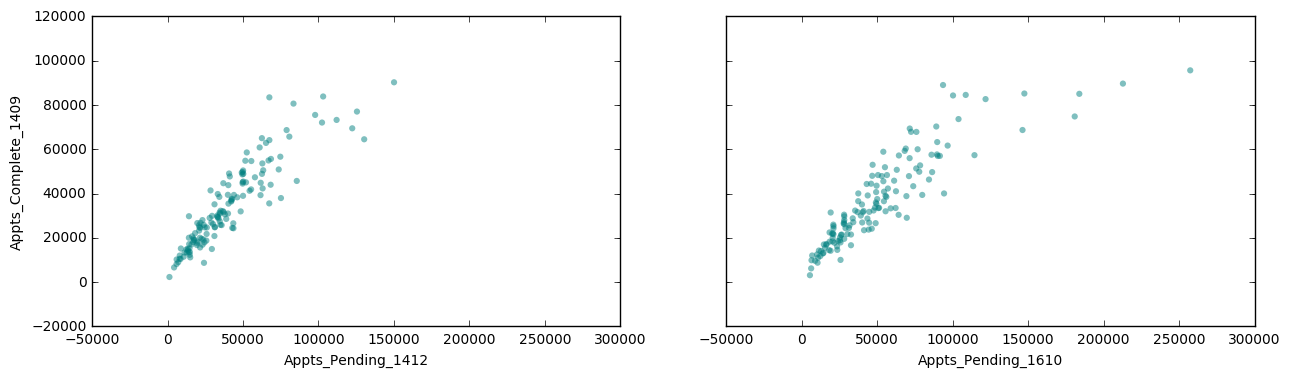

In [36]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True, figsize=(15,4))

df.plot(kind = 'scatter',x='Appts_Pending_1412', y='Appts_Complete_1409',ax=ax1,color='teal', edgecolor='none',alpha=.5)
df.plot(kind = 'scatter', x='Appts_Pending_1610', y='Appts_Complete_1608',ax=ax2,color='teal', edgecolor='none',alpha=.5)

slope, intercept, r_value, p_value, std_err = stats.linregress(df["Appts_Pending_1412"],df["Appts_Complete_1409"])
print "R-squared 2014: "+ str(r_value**2)

slope, intercept, r_value, p_value, std_err = stats.linregress(df["Appts_Pending_1610"],df["Appts_Complete_1608"])
print "R-squared 2016: "+ str(r_value**2)



### Thoughts

It appears like several outliers are really dragging pending upward, but it's still a pretty large jump. 

## Appointments National

(0, 7000000)

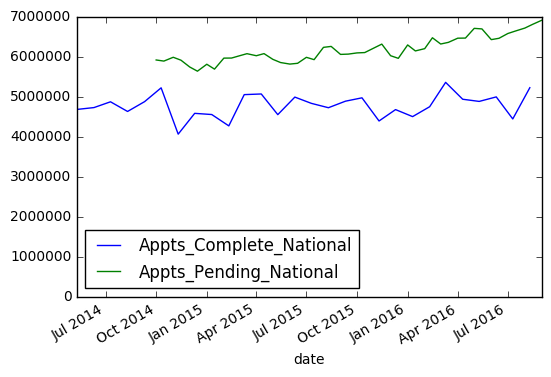

In [48]:
ax = national_complete[["Appts_Complete_National","date"]].set_index("date").plot()
national_pending[["Appts_Pending_National","date"]].set_index("date").plot(ax=ax)
ax.set_ylim(0,7000000)

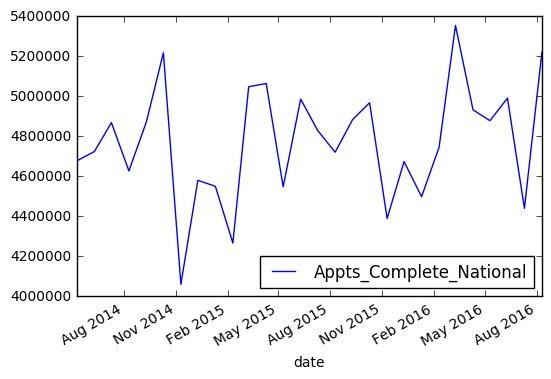

In [12]:
national_complete[["Appts_Complete_National","date"]].set_index("date").plot()

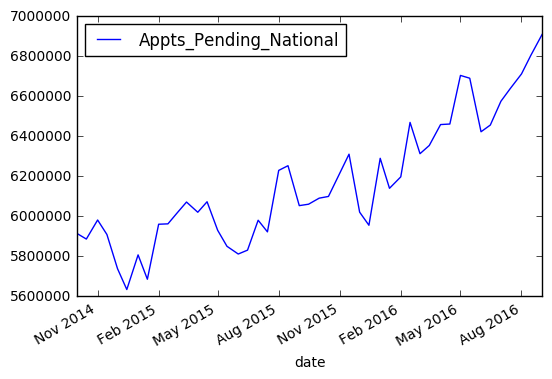

In [13]:
national_pending[["Appts_Pending_National","date"]].set_index("date").plot()

# Leadership

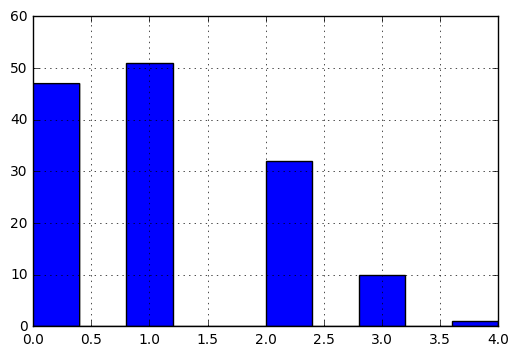

In [14]:
df["Missing_Leadership"].hist()

#### Thoughts
A majority of stations have at least one vacant or interim leadership position.

In [15]:
df["Missing_Leadership"].describe()

count    141.000000
mean       1.056738
std        0.954486
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: Missing_Leadership, dtype: float64

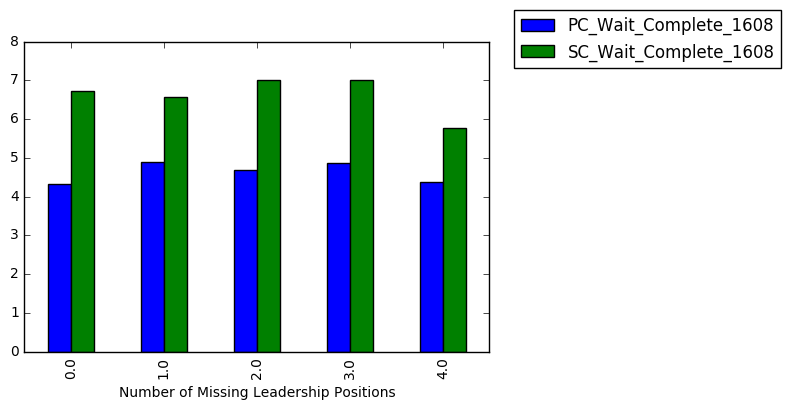

In [16]:
pivot_Missing_Leadership = pd.pivot_table(df, index=['Missing_Leadership'], values =['PC_Wait_Complete_1608','SC_Wait_Complete_1608'],aggfunc=np.mean).reset_index()
ax = pivot_Missing_Leadership.plot(kind='bar',x='Missing_Leadership')
#plt.title("Mean Primary Care Wait Time, Completed Appts 2016")
ax.set_xlabel("Number of Missing Leadership Positions")
#ax.legend_.remove()

plt.legend(bbox_to_anchor=(1.4, 1),
           bbox_transform=plt.gcf().transFigure)

### Thoughts
Wait times appear to be unaffected by missing leadership.

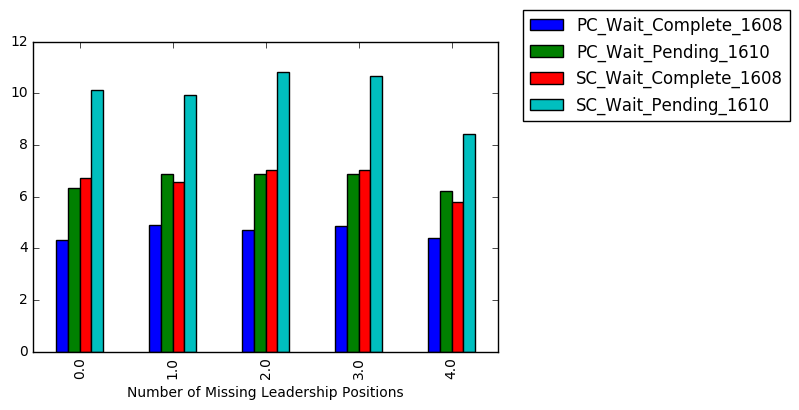

In [17]:
values = ['PC_Wait_Pending_1610','PC_Wait_Complete_1608','SC_Wait_Pending_1610','SC_Wait_Complete_1608']



pivot_Missing_Leadership = pd.pivot_table(df, index=['Missing_Leadership'], values =values,aggfunc=np.mean).reset_index()
ax = pivot_Missing_Leadership.plot(kind='bar',x='Missing_Leadership')
#plt.title("Mean Primary Care Wait Time, Completed Appts 2016")
ax.set_xlabel("Number of Missing Leadership Positions")
#ax.legend_.remove()

plt.legend(bbox_to_anchor=(1.4, 1),
           bbox_transform=plt.gcf().transFigure)

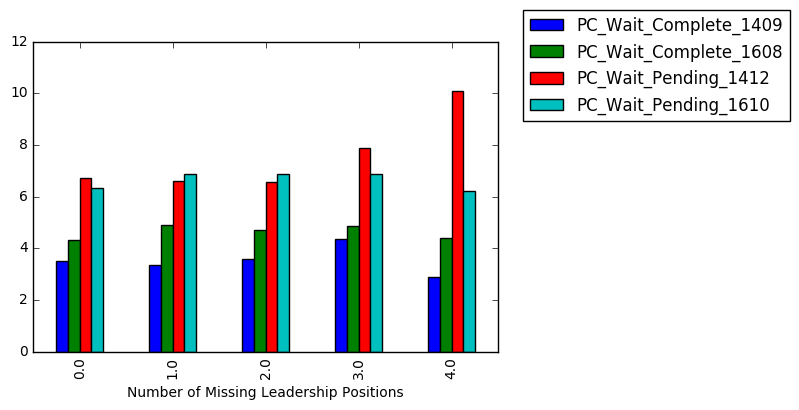

In [18]:
values = ['PC_Wait_Pending_1412','PC_Wait_Complete_1409','PC_Wait_Pending_1610','PC_Wait_Complete_1608']



pivot_Missing_Leadership = pd.pivot_table(df, index=['Missing_Leadership'], values =values,aggfunc=np.mean).reset_index()
ax = pivot_Missing_Leadership.plot(kind='bar',x='Missing_Leadership')
#plt.title("Mean Primary Care Wait Time, Completed Appts 2016")
ax.set_xlabel("Number of Missing Leadership Positions")
#ax.legend_.remove()

plt.legend(bbox_to_anchor=(1.4, 1),
           bbox_transform=plt.gcf().transFigure)

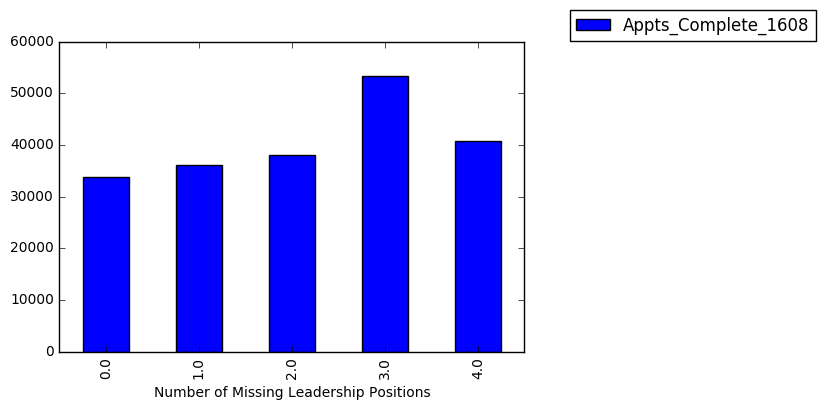

In [19]:
values = ['Appts_Complete_1608']



pivot_Missing_Leadership = pd.pivot_table(df, index=['Missing_Leadership'], values =values,aggfunc=np.mean).reset_index()
ax = pivot_Missing_Leadership.plot(kind='bar',x='Missing_Leadership')
#plt.title("Mean Primary Care Wait Time, Completed Appts 2016")
ax.set_xlabel("Number of Missing Leadership Positions")
#ax.legend_.remove()

plt.legend(bbox_to_anchor=(1.4, 1),
           bbox_transform=plt.gcf().transFigure)

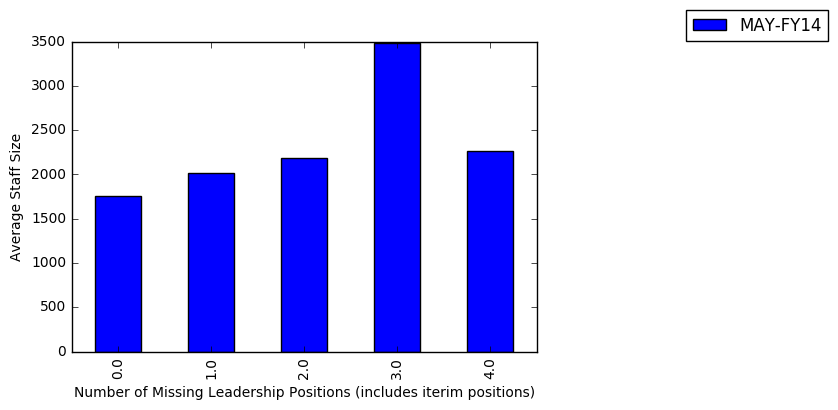

In [20]:
values = ['MAY-FY14']



pivot_Missing_Leadership = pd.pivot_table(df, index=['Missing_Leadership'], values =values,aggfunc=np.mean).reset_index()
ax = pivot_Missing_Leadership.plot(kind='bar',x='Missing_Leadership')
#plt.title("Mean Primary Care Wait Time, Completed Appts 2016")
ax.set_xlabel("Number of Missing Leadership Positions (includes iterim positions)")
ax.set_ylabel("Average Staff Size")

#ax.legend_.remove()

plt.legend(bbox_to_anchor=(1.4, 1),
           bbox_transform=plt.gcf().transFigure)

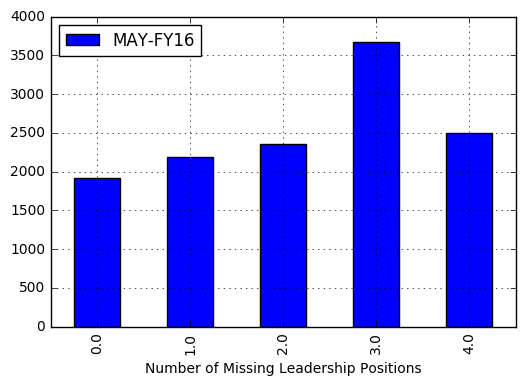

In [21]:
values = ["MAY-FY16"]



pivot_Missing_Leadership = pd.pivot_table(df, index=['Missing_Leadership'], values =values,aggfunc=np.mean).reset_index()
ax = pivot_Missing_Leadership.plot(kind='bar',x='Missing_Leadership')
#plt.title("Mean Primary Care Wait Time, Completed Appts 2016")
ax.set_xlabel("Number of Missing Leadership Positions")
#ax.legend_.remove()
ax.grid(True)

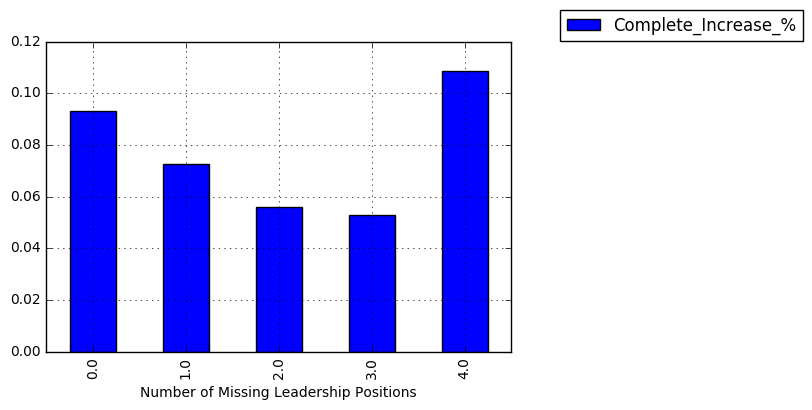

In [22]:
values = ["Complete_Increase_%"]



pivot_Missing_Leadership = pd.pivot_table(df, index=['Missing_Leadership'], values =values,aggfunc=np.mean).reset_index()
ax = pivot_Missing_Leadership.plot(kind='bar',x='Missing_Leadership')
#plt.title("Mean Primary Care Wait Time, Completed Appts 2016")
ax.set_xlabel("Number of Missing Leadership Positions")
#ax.legend_.remove()
ax.grid(True)


plt.legend(bbox_to_anchor=(1.4, 1),
           bbox_transform=plt.gcf().transFigure)

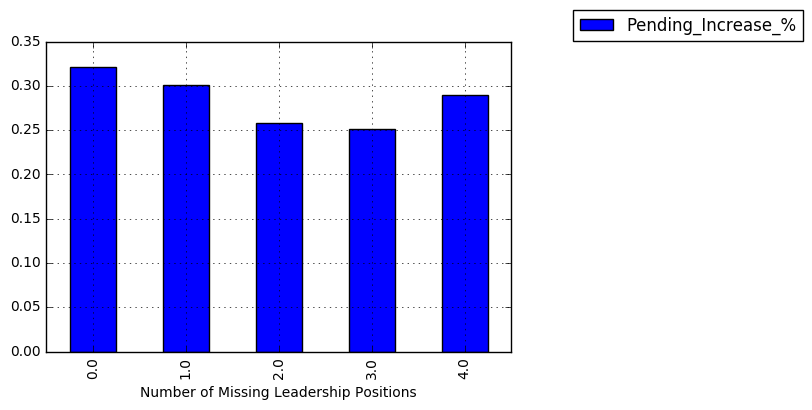

In [23]:
values = ["Pending_Increase_%"]



pivot_Missing_Leadership = pd.pivot_table(df, index=['Missing_Leadership'], values =values,aggfunc=np.mean).reset_index()
ax = pivot_Missing_Leadership.plot(kind='bar',x='Missing_Leadership')
#plt.title("Mean Primary Care Wait Time, Completed Appts 2016")
ax.set_xlabel("Number of Missing Leadership Positions")
#ax.legend_.remove()
ax.grid(True)
plt.legend(bbox_to_anchor=(1.4, 1),
           bbox_transform=plt.gcf().transFigure)

### Thoughts
While the raw numbers show more completed appointments, it appears that this is just because there are bigger stations. Missing leadership does appear to have an affect on the percent increase of completed appointments. Pending saw a similar affect. 

# Wait Times

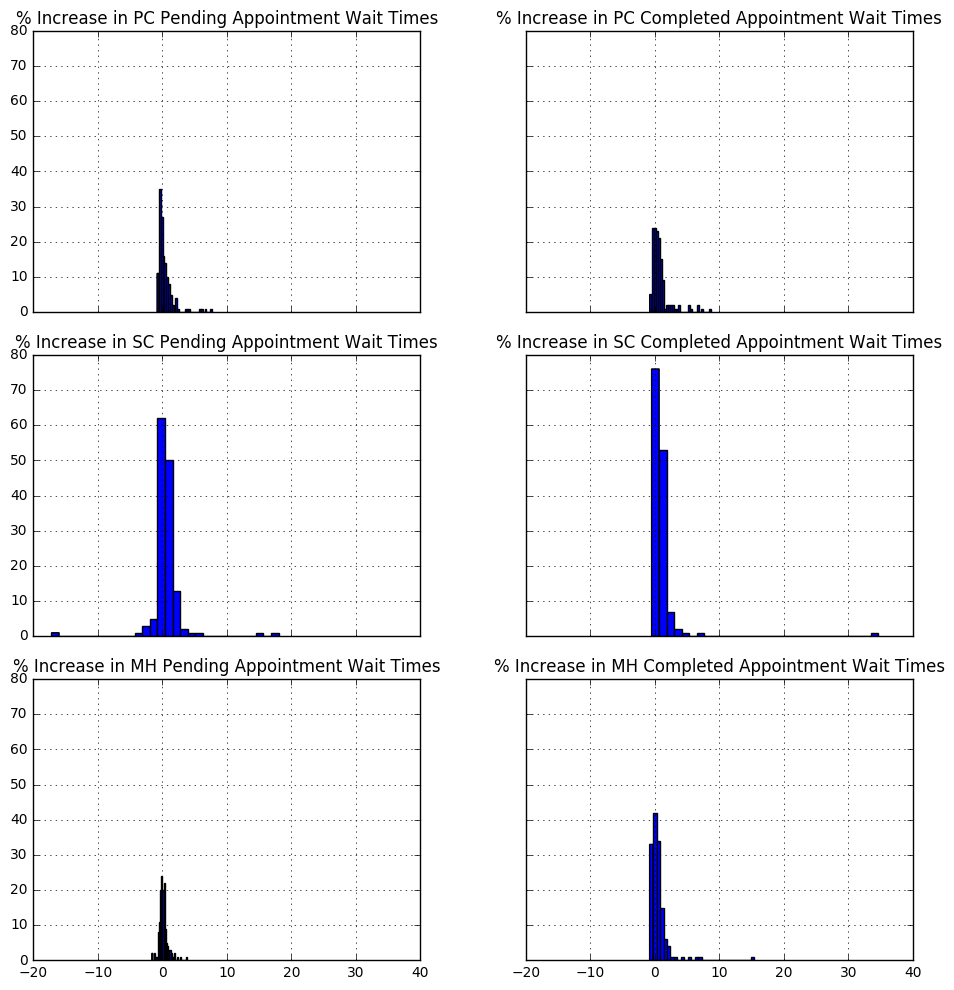

In [45]:
fig, ((ax1, ax2),(ax3, ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(10,10))

df["PC_Wait_Pending_Increase_%"].hist(bins=30, ax=ax1)
ax1.set_title("% Increase in PC Pending Appointment Wait Times")

df["PC_Wait_Complete_Increase_%"].hist(bins=30, ax=ax2)
ax2.set_title("% Increase in PC Completed Appointment Wait Times")

df["SC_Wait_Pending_Increase_%"].hist(bins=30, ax=ax3)
ax3.set_title("% Increase in SC Pending Appointment Wait Times")

df["SC_Wait_Complete_Increase_%"].hist(bins=30, ax=ax4)
ax4.set_title("% Increase in SC Completed Appointment Wait Times")

df["MH_Wait_Pending_Increase_%"].hist(bins=30, ax=ax5)
ax5.set_title("% Increase in MH Pending Appointment Wait Times")

df["MH_Wait_Complete_Increase_%"].hist(bins=30, ax=ax6)
ax6.set_title("% Increase in MH Completed Appointment Wait Times")

plt.tight_layout()

In [38]:
def multiples(metric, label):
    print("{}, Wait Times % Increase".format(label))
    fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(6,6))
    ax1.set_title("PC Pending")
    #ax1.set_ylabel(False)
    #ax1.set_ylabel(False)
    df.plot(kind ='scatter',y=metric, x ="PC_Wait_Pending_Increase_%", ax=ax1,color='teal', edgecolor='none',alpha=.5)
    
    df.plot(kind ='scatter',y=metric, x ="PC_Wait_Complete_Increase_%", ax=ax2,color='teal', edgecolor='none',alpha=.5)
    ax2.set_title("PC Complete")
    
    df.plot(kind ='scatter',y=metric, x ="SC_Wait_Pending_Increase_%", ax=ax3,color='teal', edgecolor='none',alpha=.5)
    ax3.set_title("SC Pending")
    
    df.plot(kind ='scatter',y=metric, x ="SC_Wait_Complete_Increase_%", ax=ax4,color='teal', edgecolor='none',alpha=.5)
    ax4.set_title("SC Complete")
    
    df.plot(kind ='scatter',y=metric, x ="MH_Wait_Pending_Increase_%", ax=ax5,color='teal', edgecolor='none',alpha=.5)
    ax5.set_title("MH Pending")
    
    df.plot(kind ='scatter',y=metric, x ="MH_Wait_Complete_Increase_%", ax=ax6,color='teal', edgecolor='none',alpha=.5)
    ax6.set_title("MH Complete")
    plt.tight_layout()


Staff Increase, Wait Times % Increase


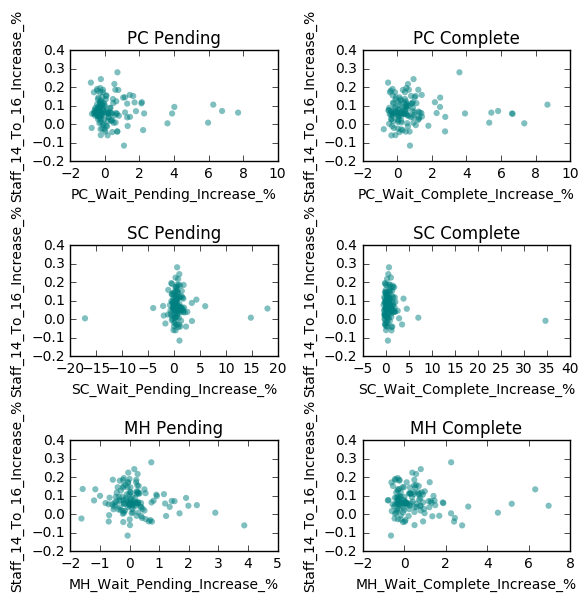

In [39]:
multiples('Staff_14_To_16_Increase_%', 'Staff Increase')

Choice Hires Percent Increase over 2014 Staff, Wait Times % Increase


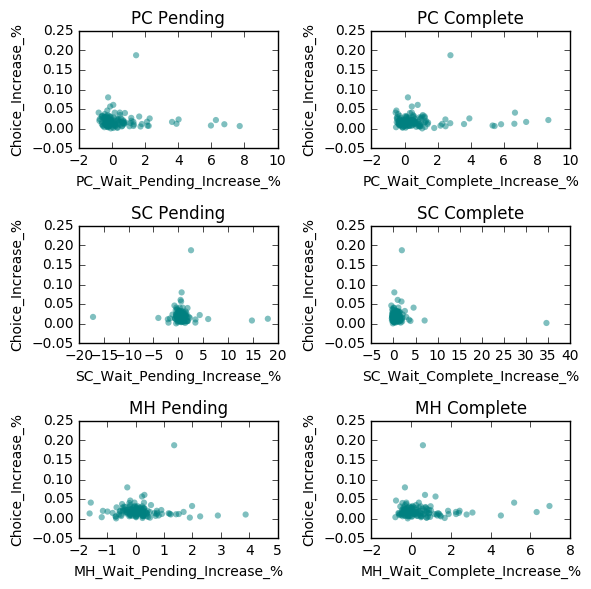

In [40]:
multiples("Choice_Increase_%","Choice Hires Percent Increase over 2014 Staff")

In [28]:
def multiples_wait(metric1, metric2, metric3, metric4, label):
    print("{}, Wait Times % Increase".format(label))
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(8,6))

    ax1.set_title("Pending Dec 2014")
    df.plot(kind ='scatter',y=metric1, x ="PC_Wait_Pending_1412", ax=ax1)

    ax2.set_title("Complete Sept 2014")
    df.plot(kind ='scatter',y=metric2, x ="PC_Wait_Complete_1409", ax=ax2)

    ax3.set_title("Pending Oct 2016")
    df.plot(kind ='scatter',y=metric3, x ="SC_Wait_Pending_1610", ax=ax3)

    ax4.set_title("Complete Aug 2016")
    df.plot(kind ='scatter',y=metric4, x ="SC_Wait_Complete_1608", ax=ax4)

    plt.tight_layout()

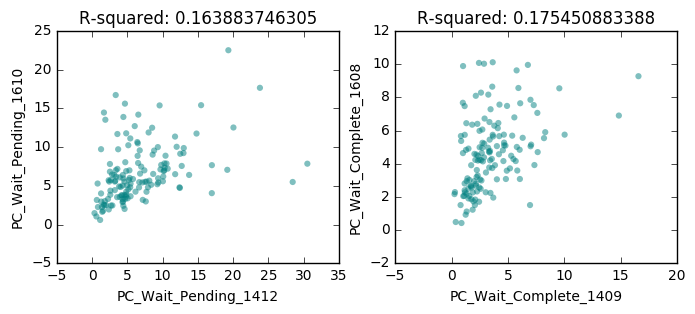

In [41]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,3))



slope, intercept, r_value, p_value, std_err = stats.linregress(df["PC_Wait_Pending_1412"],df["PC_Wait_Pending_1610"])
R =  "R-squared: "+ str(r_value**2)
ax1.set_title(R)
df.plot(kind='scatter',x="PC_Wait_Pending_1412",y="PC_Wait_Pending_1610",ax=ax1,color='teal', edgecolor='none',alpha=.5)

slope, intercept, r_value, p_value, std_err = stats.linregress(df["PC_Wait_Complete_1409"],df["PC_Wait_Complete_1608"])
R =  "R-squared: "+ str(r_value**2)
ax2.set_title(R)
df.plot(kind='scatter',x="PC_Wait_Complete_1409",y="PC_Wait_Complete_1608",ax=ax2,color='teal', edgecolor='none',alpha=.5)


### Thoughts

It should be incredible rare for any station to have a higher number of choice hires than staff increase between 2014 and 2016 - unless staffing was reduced. In places where staffing wasn't reduced, this shouldn't happen often if at all.

For one, Veterans Choice passed June 11th, 2014. These staffing numbers are for May for each year. This choice hire data is also for June, so there is an extremely small window here for big shifts. From my understand, the choice hires were meant to be in addition to normal hires. This seems to suggest that many positions that should have been filled in without the extra spending money were filled in by choice hires.

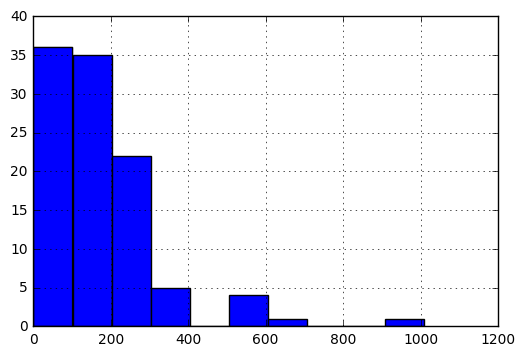

In [30]:
hist = df[df["Choice_Staff_Dif"]>0]
hist["Choice_Staff_Dif"].hist()

In [31]:
staff_increased = df[df["Staff_14_To_16_Increase_%"] >0]
staff_increased[staff_increased["Choice_Staff_Dif"] < 0]["Choice_Staff_Dif"]

8      -7.0
19     -3.0
20     -7.0
23    -18.0
57     -5.0
75     -9.0
115    -4.0
Name: Choice_Staff_Dif, dtype: float64

## Staff

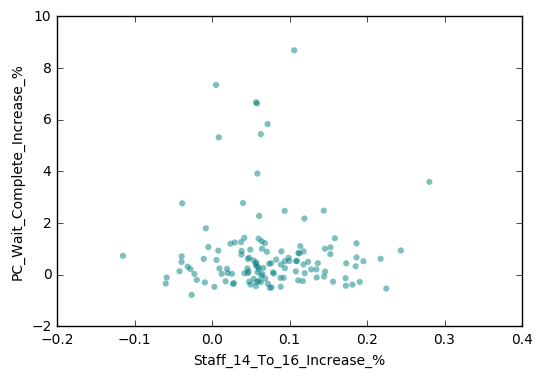

In [42]:
df.plot(kind="scatter",x="Staff_14_To_16_Increase_%",y="PC_Wait_Complete_Increase_%",color='teal', edgecolor='none',alpha=.5)

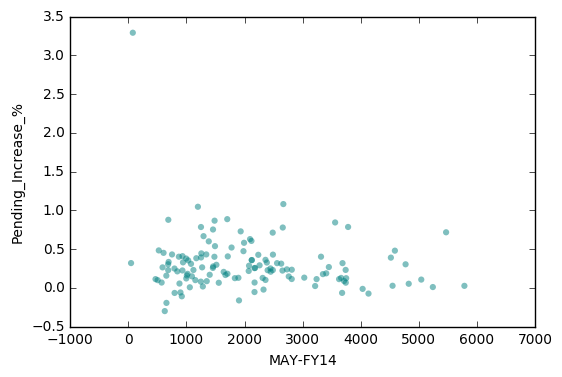

In [43]:
df.plot(kind="scatter",x="MAY-FY14",y="Pending_Increase_%",color='teal', edgecolor='none',alpha=.5)